These scripts are written for AnimalBiome (animalbiome.com).

This notebook was used to generate comparisons between individual pets and a range of animals of similar age in the data set. Data is from customer surveys about the animal's lifestyle and social and emotional attributes, and is metadata that accompanies the sequencing-based micribiome assessments AnimalBiome provides. 

In [1]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
#import data, check it out
df = pd.read_table('/Users/karigoodman/Dropbox/InsightHealthDataScience/animalBiome/KittyBiome_metadata_final_1216.txt')
df2 = df.drop_duplicates("#SampleID")
df2.head()

,#SampleID,Name,Sex,City,State,Country,Age,SocializationStatus,FecalScore,weight,...,Urinary tract disease,Ringworm,Anxiety,Depression,Stress,Sleeps,nuCatsInHouse,nuDogsInHouse,otherAnimalsInHouse,Notes
0,1006,Starbuck,Male,San Mateo,CA,USA,2.0,House,4.0,12.0,...,0,0.0,0.0,0,0.0,Our bed or window perch,1,0.0,"My husband, human",NaN
1,1007,Jack,Male,Austin,TX,USA,7.0,House,1.0,14.0,...,0,0.0,0.0,0,0.0,my bed,1,0.0,NaN,NaN
2,1010,Meowskevitz,Female,Brooklyn,NY,USA,11.0,House,3.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1,0.0,NaN,NaN
3,1011,Mimi,Female,Brooklyn,NY,USA,6.0,House,3.0,NaN,...,0,0.0,0.0,0,0.0,in human bed,1,0.0,NaN,NaN
4,1014,NaN,Female,Oxford,MS,USA,8.0,House,3.0,11.0,...,0,0.0,0.0,0,0.0,Perch near the window or foot of bed,1,1.0,"Dog, 1",NaN


In [5]:
#Selecting out the target cat
targetData = df2[(df2['#SampleID'] == '1473')]
#print targetData

In [6]:
#Defining the target cat's attributes for running a query to select the 
#group of similar cats for comparison

#Target Cat social/emotional values
ageTarget = targetData['Age']
sexTarget = targetData['Sex']
socializationTarget = targetData['SocializationStatus']
breedTarget = targetData['Breed']
sourceTarget = targetData['Source']

print ('Age: %d' % ageTarget) 
print ('Sex: %s' % sexTarget) 
print ('Socialization status: %s' % socializationTarget) 
print ('Breed: %s' % breedTarget) 
print ('Active: %s' % sourceTarget) 

Age: 1
Sex: 165    Male
Name: Sex, dtype: object
Socialization status: 165    House
Name: SocializationStatus, dtype: object
Breed: 165    DSH
Name: Breed, dtype: object
Active: 165    Shelter
Name: Source, dtype: object


In [7]:
#Target Cat social/emotional values (fed into plot as axvline)
outgoingTarget = targetData['Outgoing']
attentionTarget = targetData['Response2Attention']
socialTarget = targetData['SocialwithAnimals']
smartTarget = targetData['Smart']
activeTarget = targetData['Active']
moodsTarget = targetData['Moods']
toleranceTarget = targetData['ToleratesRestraint']

print ('How you rated your cat for various social/emotional factors, on a scale of 1-10') 
print ('Outgoing: %f' % outgoingTarget) 
print ('Response to attention: %f' % attentionTarget) 
print ('Social with animals: %f' % socialTarget) 
print ('Smart: %f' % smartTarget) 
print ('Active: %f' % activeTarget) 
print ('Moods: %f' % moodsTarget) 
print ('Tolerates restraint: %f' % toleranceTarget)

How you rated your cat for various social/emotional factors, on a scale of 1-10
Outgoing: 10.000000
Response to attention: 10.000000
Social with animals: 10.000000
Smart: 5.000000
Active: 10.000000
Moods: 5.000000
Tolerates restraint: 5.000000


In [8]:
#finding a group of similar cats to targetCat
#here will be a unique query for each cat, depending on their metadata
simCats =  df2[ (df2['Age'] >= 1) & (df2['Age'] < 20) & (df2['SocializationStatus'] == 'House')]
#(50  < df['heart rate']) 
numberCats = len(simCats)
print ('There are this many similar cats in the dataset: %s' % numberCats) 
simCats.head()

There are this many similar cats in the dataset: 173


,#SampleID,Name,Sex,City,State,Country,Age,SocializationStatus,FecalScore,weight,...,Urinary tract disease,Ringworm,Anxiety,Depression,Stress,Sleeps,nuCatsInHouse,nuDogsInHouse,otherAnimalsInHouse,Notes
0,1006,Starbuck,Male,San Mateo,CA,USA,2.0,House,4.0,12.0,...,0,0.0,0.0,0,0.0,Our bed or window perch,1,0.0,"My husband, human",NaN
1,1007,Jack,Male,Austin,TX,USA,7.0,House,1.0,14.0,...,0,0.0,0.0,0,0.0,my bed,1,0.0,NaN,NaN
2,1010,Meowskevitz,Female,Brooklyn,NY,USA,11.0,House,3.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1,0.0,NaN,NaN
3,1011,Mimi,Female,Brooklyn,NY,USA,6.0,House,3.0,NaN,...,0,0.0,0.0,0,0.0,in human bed,1,0.0,NaN,NaN
4,1014,NaN,Female,Oxford,MS,USA,8.0,House,3.0,11.0,...,0,0.0,0.0,0,0.0,Perch near the window or foot of bed,1,1.0,"Dog, 1",NaN


In [9]:
#Outgoing
#simCats.Outgoing.unique()
outgoing_data = simCats[np.isfinite(simCats['Outgoing'])]
outgoing = outgoing_data['Outgoing']
outgoing_all = sum(outgoing)
print outgoing_all/len(outgoing)
print len(outgoing)

7.22289156627
166


In [10]:
#Response to attention
attention_data = simCats[np.isfinite(simCats['Response2Attention'])]
attention = attention_data['Response2Attention']
attention_all = sum(attention)
print attention_all/len(attention)
print len(attention)

7.36526946108
167


In [11]:
#Social with animals
social_data = simCats[np.isfinite(simCats['SocialwithAnimals'])]
social = social_data['SocialwithAnimals']
social_all = sum(social)
print social_all/len(social)
print len(social)

4.75757575758
165


In [12]:
#Smart
smart_data = simCats[np.isfinite(simCats['Smart'])]
smart = smart_data['Smart']
smart_all = sum(smart)
print smart_all/len(smart)
print len(smart)

6.7125748503
167


In [13]:
#Active
active_data = simCats[np.isfinite(simCats['Active'])]
active = active_data['Active']
active_all = sum(active)
print active_all/len(active)
print len(active)

5.10240963855
166


In [14]:
#Moods
moods_data = simCats[np.isfinite(simCats['Moods'])]
moods = moods_data['Moods']
moods_all = sum(moods)
print moods_all/len(moods)
print len(moods)

8.07317073171
164


In [15]:
#Tolerates Restraint
tolerance_data = simCats[np.isfinite(simCats['ToleratesRestraint'])]
tolerance = tolerance_data['ToleratesRestraint']
tolerance_all = sum(tolerance)
print tolerance_all/len(tolerance)
print len(tolerance)

5.13173652695
167


In [16]:
print int(smartTarget)

5


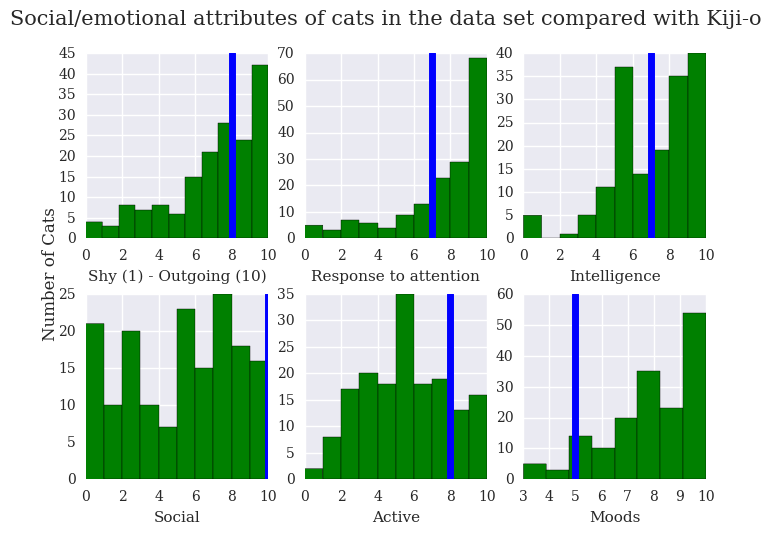

In [19]:
#Create a figure showing how the target animal compares to other animals in the 
#data set. 

#Create figure
fig = plt.figure()
fig.set_size_inches(12, 9)
sns.set(font='serif')
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

#Outgoing
ax1.hist(outgoing, color = 'g', bins = 11)
ax1.set_xlabel("Shy (1) - Outgoing (10)")
ax1.axvline(int(outgoingTarget), color='b', linestyle='solid', linewidth=5)

#Response to attention
ax2.hist(attention, color='g', bins=10)
ax2.set_xlabel("Response to attention")
ax2.axvline(int(attentionTarget), color='b', linestyle='solid', linewidth=5)

#Intelligence
ax3.hist(smart, color='g', bins=10)
ax3.set_xlabel("Intelligence")
ax3.axvline(int(smartTarget), color='b', linestyle='solid', linewidth=5)

#Social
#ax4.axis('off')
ax4.hist(social, color = 'g', bins = 10)
ax4.set_xlabel("Social")
ax4.axvline(int(socialTarget), color='b', linestyle='solid', linewidth=5)

#Active
ax5.hist(active, color='g', bins=10)
ax5.set_xlabel("Active")
ax5.axvline(int(activeTarget), color='b', linestyle='solid', linewidth=5)

#Moods
#ax6.axis('off')
ax6.hist(moods, color='g', bins=8)
ax6.set_xlabel("Moods")
ax6.axvline(int(moodsTarget), color='b', linestyle='solid', linewidth=5)

#Adjust spacing and titles, save
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)
fig.text(0.07, 0.5, 'Number of Cats', va='center', rotation='vertical', fontsize=12)
fig.suptitle('Social/emotional attributes of cats in the data set compared with Kiji-o', fontsize=15)
fig.savefig('1473_social_emotional.png', bbox_inches='tight')